In [1]:
import cv2
import torch
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt




In [3]:
path_dir = '/Users/lukassanner/Documents/ZeissHackathon/photomask_trainingdata'


In [4]:

dirs = os.listdir(path_dir)[1:]

data = {}

for d in dirs:
    folder_dir = os.path.join(path_dir,d)
    files = os.listdir(folder_dir)

    tifs = []
    for f in files:
        if f.endswith('.tif'):
            tifs.append(os.path.join(folder_dir, f))
    data[d] = tifs


In [5]:
statistics = {}

over_all_statistics = {}
over_all_statistics['max'] = []
over_all_statistics['std'] = []
over_all_statistics['var'] = []
over_all_statistics['mean'] = []
for d in dirs:
    maxs= []
    stds = []
    variances = []
    means = []
    stats = {}
    

    for fname in data[d]:
        image = np.array(Image.open(fname)) / 255
    
        maximum = np.max(image)
        std = np.std(image)
        var = np.var(image)
        mean = np.mean(image)
        
        maxs.append(maximum)
        stds.append(std)
        variances.append(var)
        means.append(mean)
        
        over_all_statistics['mean'].append(mean)
        over_all_statistics['max'].append(maximum)
        over_all_statistics['std'].append(std)
        over_all_statistics['var'].append(var)

    stats['max'] = maxs
    stats['var'] = variances
    stats['std'] = stds
    stats['mean'] = means
    
    statistics[d] = stats
    

Text(0.5, 1.0, 'mean')

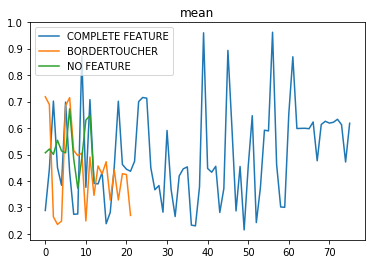

In [6]:
stat_type='mean'
fig, axs= plt.subplots()
for d in dirs:
    axs.plot(statistics[d][stat_type], label=d)

axs.legend()
axs.set_title(stat_type)

Text(0.5, 1.0, 'max')

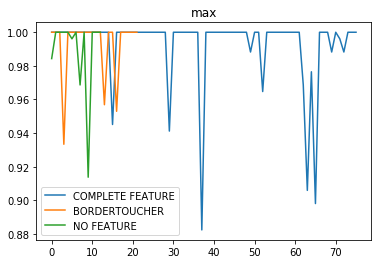

In [7]:
stat_type='max'
fig, axs= plt.subplots()
for d in dirs:
    axs.plot(statistics[d][stat_type], label=d)

axs.legend()
axs.set_title(stat_type)

Text(0.5, 1.0, 'var')

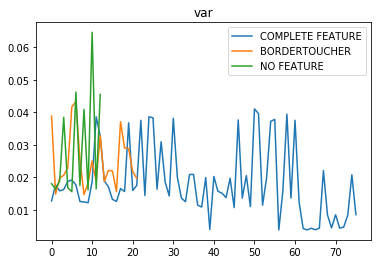

In [8]:
stat_type='var'
fig, axs= plt.subplots()
for d in dirs:
    axs.plot(statistics[d][stat_type], label=d)

axs.legend()
axs.set_title(stat_type)

Text(0.5, 1.0, 'std')

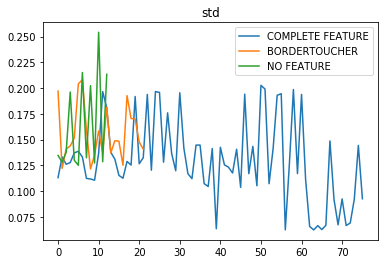

In [9]:
stat_type='std'
fig, axs= plt.subplots()
for d in dirs:
    axs.plot(statistics[d][stat_type], label=d)

axs.legend()
axs.set_title(stat_type)

for max: min 0.8823529411764706, max 1.0, mean 0.9923335099805689
for mean: min 0.21517319046889122, max 0.9619681517577446, mean 0.48907424866936267
for std: min 0.06223023631593172, max 0.25427289233246375, mean 0.13881876571234844
for var: min 0.003872602311936707, max 0.0646547037751167, mean 0.020875400083589513


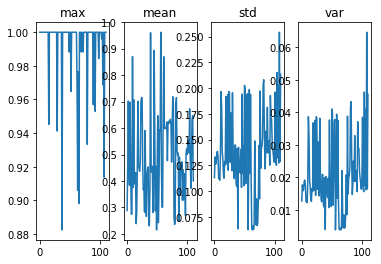

In [10]:
stat_types = ['max', 'mean', 'std', 'var']

for stat_type in stat_types:
    mi= np.min(over_all_statistics[stat_type])
    ma =np.max(over_all_statistics[stat_type])
    mean = np.mean(over_all_statistics[stat_type])
    print(f"for {stat_type}: min {mi}, max {ma}, mean {mean}")
fig, axs = plt.subplots(1,len(stat_types))
for k, stat_type in enumerate(stat_types):
    axs[k].plot(over_all_statistics[stat_type])
    axs[k].set_title(stat_type)